In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np

# Cargar el dataset
file_path = "Titanic-Dataset.csv"  
titanic_data = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(titanic_data.head())

# Información general del dataset
print("\nInformación del dataset:")
print(titanic_data.info())

# Resumen estadístico de las columnas numéricas
print("\nResumen estadístico:")
print(titanic_data.describe())

# Verificar valores faltantes
print("\nValores faltantes por columna:")
print(titanic_data.isnull().sum())

Primeras filas del dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450 

In [4]:
# Imputar valores faltantes
# Para Age, se usará la mediana
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Para Embarked, se usará la moda
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Eliminar la columna Cabin debido a la gran cantidad de valores faltantes
titanic_data.drop(columns=['Cabin'], inplace=True)

# Codificar variables categóricas
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)

# Eliminar columnas irrelevantes
titanic_data.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

# Revisar el dataset después del preprocesamiento
print("Dataset después del preprocesamiento:")
print(titanic_data.head())

Dataset después del preprocesamiento:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    0  22.0      1      0   7.2500       False        True
1         1       1    1  38.0      1      0  71.2833       False       False
2         1       3    1  26.0      0      0   7.9250       False        True
3         1       1    1  35.0      1      0  53.1000       False        True
4         0       3    0  35.0      0      0   8.0500       False        True


C:\Users\alfonsolopez\AppData\Local\Temp\ipykernel_14184\4138362546.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
C:\Users\alfonsolopez\AppData\Local\Temp\ipykernel_14184\4138362546.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [6]:
# Imputar valores faltantes
# Para Age, se usará la mediana
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())

# Para Embarked, se usará la moda
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

# Eliminar la columna Cabin debido a la gran cantidad de valores faltantes
titanic_data = titanic_data.drop(columns=['Cabin'])

# Codificar variables categóricas
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)

# Eliminar columnas irrelevantes
titanic_data = titanic_data.drop(columns=['Name', 'Ticket', 'PassengerId'])

# Revisar el dataset después del preprocesamiento
print("Dataset después del preprocesamiento:")
print(titanic_data.head())


KeyError: 'Embarked'

In [8]:
# Verificar las columnas disponibles
print("Columnas del dataset:")
print(titanic_data.columns)


Columnas del dataset:
Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [10]:
# Imputar valores faltantes en las columnas dummy de Embarked
titanic_data['Embarked_Q'] = titanic_data['Embarked_Q'].fillna(titanic_data['Embarked_Q'].mode()[0])
titanic_data['Embarked_S'] = titanic_data['Embarked_S'].fillna(titanic_data['Embarked_S'].mode()[0])

# Revisar el dataset después del preprocesamiento
print("Dataset después del preprocesamiento:")
print(titanic_data.head())

Dataset después del preprocesamiento:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    0  22.0      1      0   7.2500       False        True
1         1       1    1  38.0      1      0  71.2833       False       False
2         1       3    1  26.0      0      0   7.9250       False        True
3         1       1    1  35.0      1      0  53.1000       False        True
4         0       3    0  35.0      0      0   8.0500       False        True


In [12]:
# Selección de características y variable objetivo
X = titanic_data.drop(columns=['Survived'])  # Características
y = titanic_data['Survived']  # Variable objetivo

# Dividir en conjunto de entrenamiento y conjunto de prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo (Regresión Logística)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar los resultados
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Matriz de confusión:")
print(conf_matrix)

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
Matriz de confusión:
[[90 15]
 [19 55]]


In [16]:
# Matriz de confusión
print(conf_matrix)

# Explicación de los valores en la matriz
print("Interpretación de la matriz de confusión:")
print(f"Verdaderos negativos (No sobrevivieron y predicho correctamente): {conf_matrix[0, 0]}")
print(f"Falsos positivos (No sobrevivieron pero predicho como sobrevivieron): {conf_matrix[0, 1]}")
print(f"Falsos negativos (Sobrevivieron pero predicho como no sobrevivieron): {conf_matrix[1, 0]}")
print(f"Verdaderos positivos (Sobrevivieron y predicho correctamente): {conf_matrix[1, 1]}")


[[90 15]
 [19 55]]
Interpretación de la matriz de confusión:
Verdaderos negativos (No sobrevivieron y predicho correctamente): 90
Falsos positivos (No sobrevivieron pero predicho como sobrevivieron): 15
Falsos negativos (Sobrevivieron pero predicho como no sobrevivieron): 19
Verdaderos positivos (Sobrevivieron y predicho correctamente): 55


In [18]:
from sklearn.model_selection import train_test_split

# Seleccionar características (X) y la variable objetivo (y)
X = titanic_data.drop(columns=['Survived'])  # Eliminar la columna objetivo
y = titanic_data['Survived']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Mostrar las dimensiones de los conjuntos divididos
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")


Dimensiones de X_train: (712, 8)
Dimensiones de X_test: (179, 8)
Dimensiones de y_train: (712,)
Dimensiones de y_test: (179,)


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Crear el modelo con hiperparámetros iniciales
tree_model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
tree_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = tree_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar resultados
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Matriz de confusión:")
print(conf_matrix)


Accuracy: 0.776536312849162
Precision: 0.8085106382978723
Recall: 0.5507246376811594
F1 Score: 0.6551724137931034
Matriz de confusión:
[[101   9]
 [ 31  38]]


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predicciones en el conjunto de prueba
y_test_pred = model.predict(X_test)

# Cálculo de métricas
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Mostrar los resultados
print("Desempeño del modelo en el conjunto de prueba:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")
print("Matriz de confusión:")
print(test_conf_matrix)



Desempeño del modelo en el conjunto de prueba:
Accuracy: 0.7988826815642458
Precision: 0.7796610169491526
Recall: 0.6666666666666666
F1 Score: 0.71875
Matriz de confusión:
[[97 13]
 [23 46]]


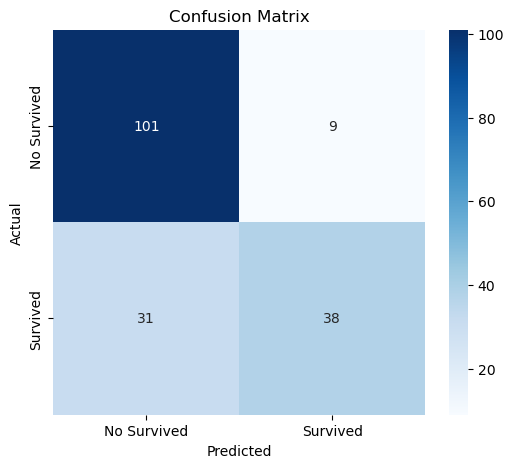

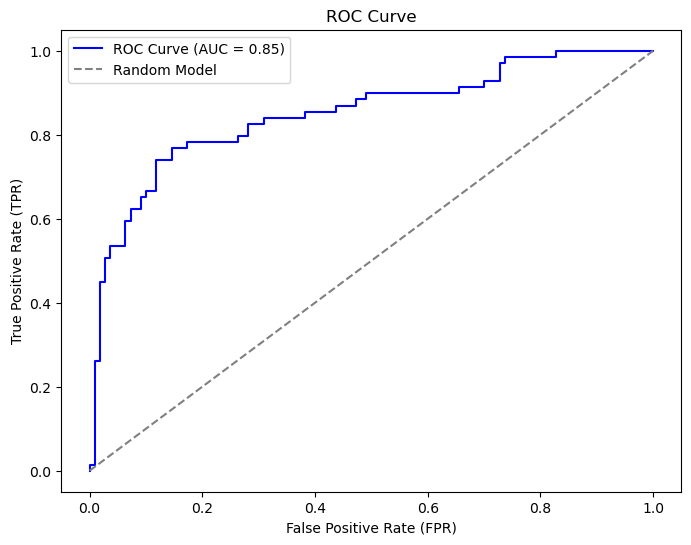

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# 1. Matriz de confusión (heatmap)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Survived', 'Survived'], yticklabels=['No Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Curva ROC y AUC
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades de predicción para clase positiva
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Model')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

# 3. Importancia de características
importances = model.feature_importances_
features = X_train.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


C:\Users\alfonsolopez\AppData\Local\Temp\ipykernel_14184\1187381632.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients, y=features, palette='viridis')


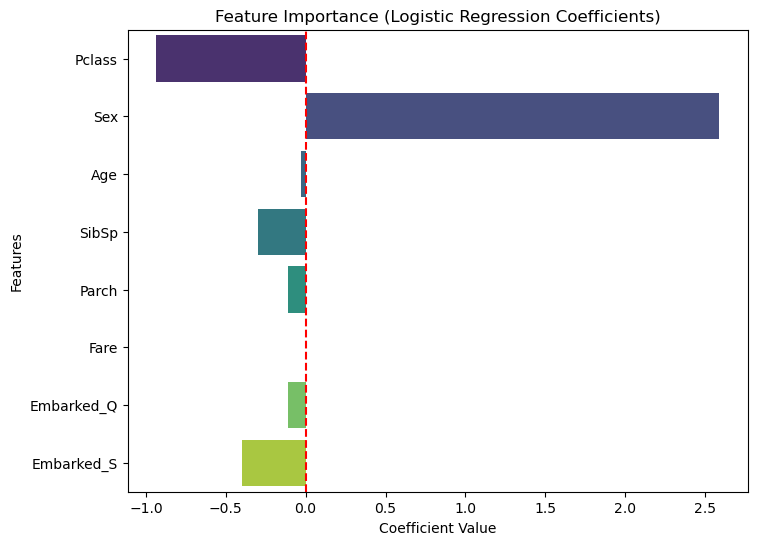

In [26]:
# 3. Importancia de características usando coeficientes de regresión logística
coefficients = model.coef_[0]  # Coeficientes del modelo
features = X_train.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=coefficients, y=features, palette='viridis')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.axvline(0, color='red', linestyle='--')  # Línea vertical en 0 para distinguir efectos positivos y negativos
plt.show()
